In [6]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [7]:
trainset='/content/drive/MyDrive/10_Food_data/train'
validationset='/content/drive/MyDrive/10_Food_data/validation'
train=ImageDataGenerator(rescale=1/255.0,validation_split=0)
validation=ImageDataGenerator(rescale=1/255.0,validation_split=0.9)

In [8]:
train_data=train.flow_from_directory(trainset,target_size=(150,150),batch_size=10,class_mode='categorical',subset="training",shuffle=True,)
validation_set=validation.flow_from_directory(validationset,target_size=(150,150),batch_size=10,class_mode='categorical',shuffle=True,subset="validation",)

Found 81 images belonging to 10 classes.
Found 79 images belonging to 10 classes.


In [9]:
print(train_data.class_indices)
print(validation_set.class_indices)

{'banh_mi': 0, 'banh_xeo': 1, 'bun_dau': 2, 'che': 3, 'coffee': 4, 'com_tam': 5, 'goi_cuon': 6, 'hot_vit_lon': 7, 'pho': 8, 'xoi': 9}
{'banh_mi': 0, 'banh_xeo': 1, 'bun_dau': 2, 'che': 3, 'coffee': 4, 'com_tam': 5, 'goi_cuon': 6, 'hot_vit_lon': 7, 'pho': 8, 'xoi': 9}


In [10]:
from keras.backend import conv2d
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

In [11]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history=model.fit(train_data,batch_size=10,epochs=30,verbose=1,validation_data=validation_set)

Epoch 1/30
9/9 [==============================] - 90s 10s/step - loss: 5.7482 - accuracy: 0.1111 - val_loss: 2.2862 - val_accuracy: 0.1139
Epoch 2/30
9/9 [==============================] - 10s 1s/step - loss: 2.2957 - accuracy: 0.1852 - val_loss: 2.3861 - val_accuracy: 0.1266
Epoch 3/30
9/9 [==============================] - 10s 1s/step - loss: 2.3046 - accuracy: 0.1605 - val_loss: 2.3016 - val_accuracy: 0.1266
Epoch 4/30
9/9 [==============================] - 11s 1s/step - loss: 2.4243 - accuracy: 0.3210 - val_loss: 2.9756 - val_accuracy: 0.1013
Epoch 5/30
9/9 [==============================] - 10s 1s/step - loss: 2.0209 - accuracy: 0.3704 - val_loss: 3.0749 - val_accuracy: 0.1013
Epoch 6/30
9/9 [==============================] - 10s 1s/step - loss: 3.4328 - accuracy: 0.5062 - val_loss: 2.3553 - val_accuracy: 0.1519
Epoch 7/30
9/9 [==============================] - 10s 1s/step - loss: 1.1307 - accuracy: 0.7160 - val_loss: 2.4263 - val_accuracy: 0.2405
Epoch 8/30
9/9 [=================

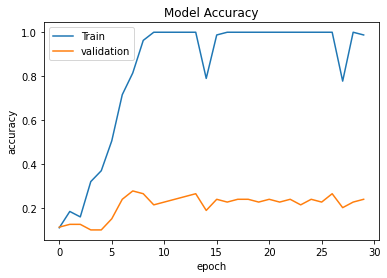

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [14]:
model.save('/content/drive/MyDrive/BT AI/10_Food.h5')

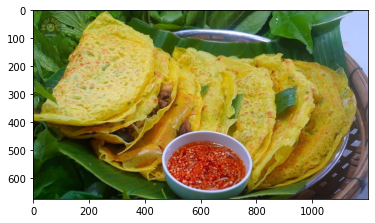

In [25]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img,img_to_array
load_model('/content/drive/MyDrive/BT AI/10_Food.h5')
url='/content/drive/MyDrive/10_Food_data/validation/banh_xeo/0-1200x676-19.jpg'
plt.imshow(load_img(url))

In [26]:
img=load_img('/content/drive/MyDrive/10_Food_data/validation/banh_xeo/0-1200x676-19.jpg',target_size=(150,150))
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([1])